In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from time import time
import math

In [2]:
data = pd.read_csv("train.csv")
 
X = data.iloc[:,1:]  # pixel 像素点
y = data.iloc[:,0]   # label 标签
 
X.shape#(42000, 784)


(42000, 784)

In [3]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


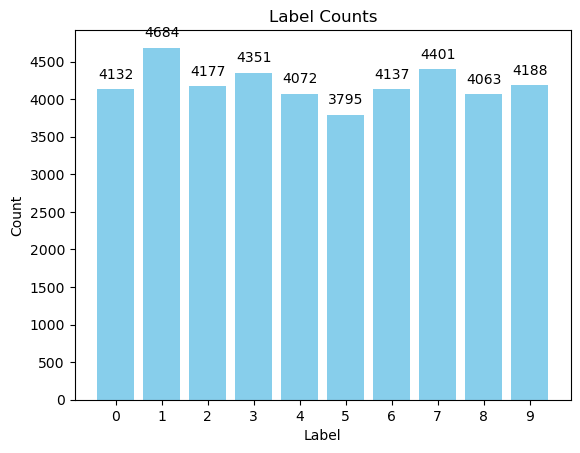

In [5]:
import matplotlib.pyplot as plt

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
counts = [4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188]

plt.bar(labels, counts, color='skyblue')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts')

for i in range(len(labels)):
    plt.text(labels[i], counts[i] + 100, str(counts[i]), ha='center', va='bottom')

plt.xticks(labels)
plt.yticks(range(0, max(counts) + 200, 500))

plt.show()


In [6]:
# Plots the image represented by a row
def plot_number(row, w=28, h=28, labels=True):
    if labels:
        # the first column contains the label
        label = row[0]
        # The rest of columns are pixels
        pixels = row[1:]
    else:
        label = ''
        # The rest of columns are pixels
        pixels = row[0:]
    
#    print(row.shape, pixels.shape)
        

    # Make those columns into a array of 8-bits pixels
    # This array will be of 1D with length 784
    # The pixel intensity values are integers from 0 to 255
    pixels = 255-np.array(pixels, dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((w, h))

    # Plot
    if labels:
        plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')

# Plots a whole slice of pictures
def plot_slice(rows, size_w=28, size_h=28, labels=True):
    num = rows.shape[0]
    w = 4
    h = math.ceil(num / w)
    fig, plots = plt.subplots(h, w)
    fig.tight_layout()

    for n in range(0, num):
        s = plt.subplot(h, w, n+1)
        s.set_xticks(())
        s.set_yticks(())
        plot_number(rows.iloc[n], size_w, size_h, labels)
    plt.show()



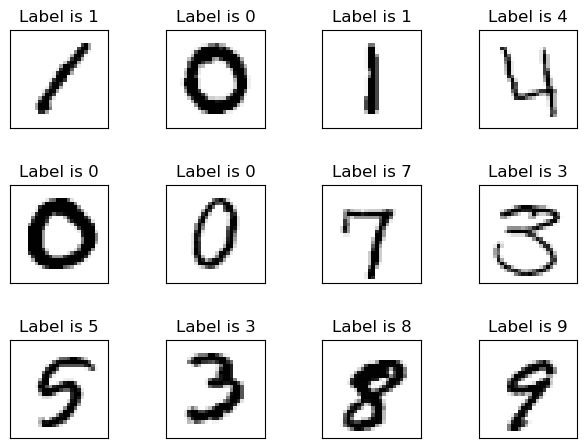

In [7]:
# Plotting first few rows
plot_slice(data[0:12])

In [8]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC

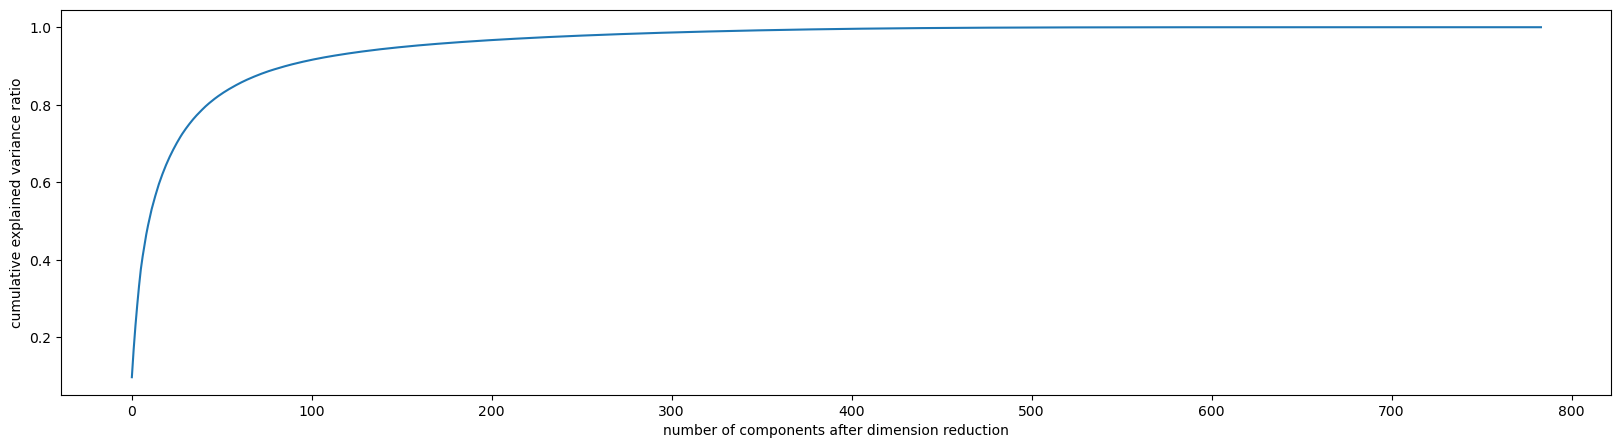

In [9]:
pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()


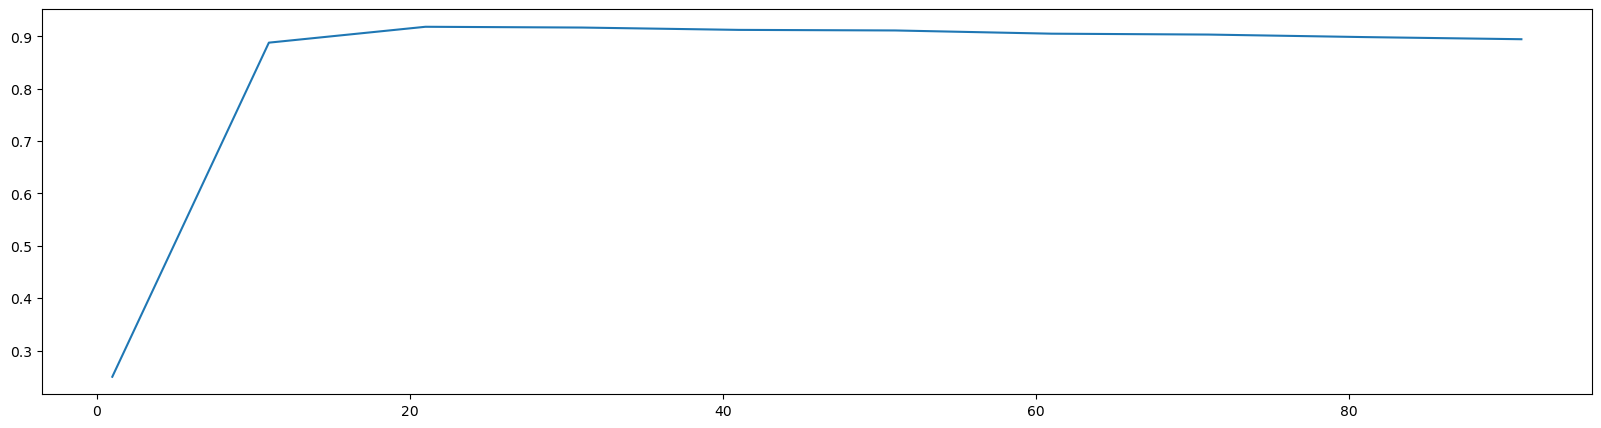

In [10]:
# time warning
score = []
for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0)
                           ,X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

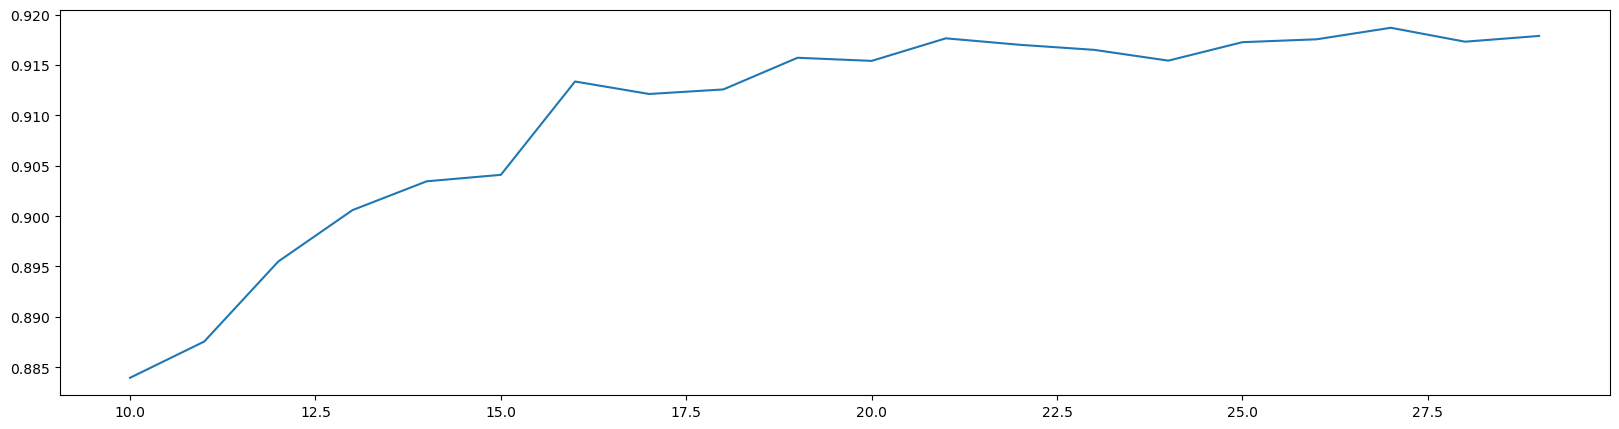

In [11]:
score = []
for i in range(10,30):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,30),score)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.30, random_state=4)

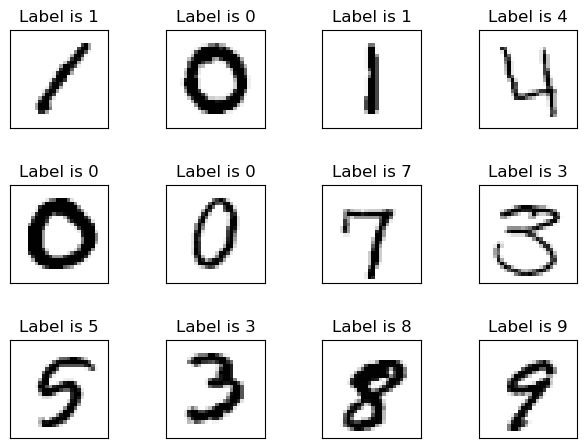

In [13]:
# Plotting first few rows
plot_slice(data[0:12])

In [14]:
n_components = 16
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)
print("done in %0.3fs" % (time() - t0))

X_train_pca = pca.transform(X)

done in 2.110s


In [15]:
np.sum(pca.explained_variance_ratio_)

0.5953476699161816

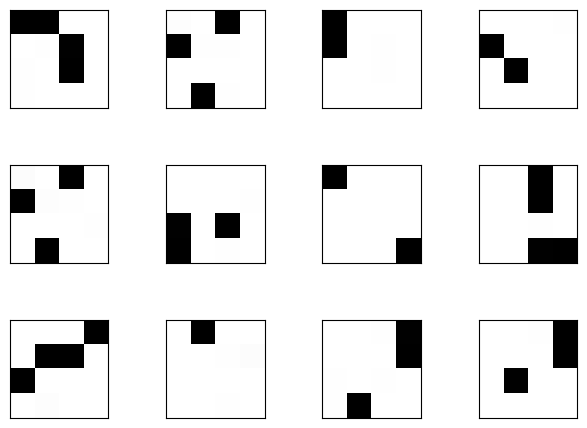

In [16]:
plot_slice(pd.DataFrame(data=X_train_pca[0:12]), size_w=4, size_h=4, labels=False)

In [17]:
param_grid = { "C" : [0.1]
              , "gamma" : [0.1]}
rf = SVC()
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train_pca, y)

print(gs.best_score_)
print(gs.best_params_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
0.9428809523809524
{'C': 0.1, 'gamma': 0.1}


In [18]:
bp = gs.best_params_

t0 = time()
clf = SVC(C=bp['C'], kernel='rbf', gamma=bp['gamma'])
clf = clf.fit(X_train_pca, y)
print("done in %0.3fs" % (time() - t0))


done in 24.996s


In [19]:
clf.score(pca.transform(X_ts), y_ts)

0.9567460317460318

In [20]:
n_components = 22
t0_2 = time()
pca2 = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)
print("done in %0.3fs" % (time() - t0_2))

X_train_pca2 = pca2.transform(X)

done in 1.664s


In [21]:
np.sum(pca2.explained_variance_ratio_)

0.6656502028933302

ValueError: cannot reshape array of size 22 into shape (4,4)

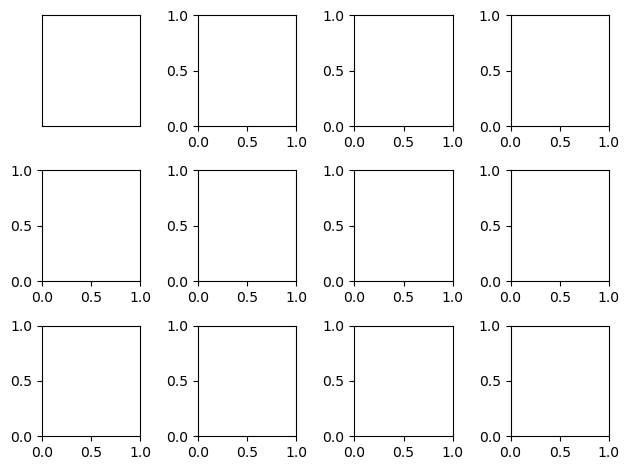

In [22]:
plot_slice(pd.DataFrame(data=X_train_pca2[0:12]), size_w=4, size_h=4, labels=False)

In [23]:
param_grid = { "C" : [0.1]
              , "gamma" : [0.1]}
rf = SVC()
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train_pca2, y)

print(gs.best_score_)
print(gs.best_params_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
0.9507857142857143
{'C': 0.1, 'gamma': 0.1}


In [24]:
bp = gs.best_params_

t0_2 = time()
clf2 = SVC(C=bp['C'], kernel='rbf', gamma=bp['gamma'])
clf2 = clf.fit(X_train_pca2, y)
print("done in %0.3fs" % (time() - t0))


done in 312.292s


In [26]:
clf2.score(pca2.transform(X_ts), y_ts)

0.9689682539682539

In [28]:
#val = pd.read_csv('test.csv')
val = pd.read_csv('test.csv')
pred = clf2.predict(pca2.transform(val))
# ImageId,Label

val['Label'] = pd.Series(pred)
val['ImageId'] = val.index +1
sub = val[['ImageId','Label']]

sub.to_csv('submission.csv', index=False)